<h1 style="text-align:center">Titanic Survival Prediction</h1>
<br>
<img src = "https://dailydosenow.com/wp-content/uploads/2020/07/titanic-sinking-1024x678.jpeg" width="650" height="750">

<h2 class="sc-csCMJt sc-fbJfA sc-cVxMmz gttkKI hmVOek cdrORu" style="text-align:center">Dataset Description</h2></div>
<div class="sc-gKcDQK gVfUPR"><h3>Overview</h3>
<p>The data has been split into two groups:</p>
<ul>
<li>training set (train.csv)</li>
<li>test set (test.csv)</li>
</ul>
<p><b> The training set </b>should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use <a rel="noreferrer nofollow" target="_blank" href="https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/"> feature engineering </a>to create new features.</p>
<p><b>The test set </b>should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.</p>
<p>We also include <b>gender_submission.csv</b>, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.</p>
<h3>Variable Notes</h3>
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p></div>

<div style="text-align:center">
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sklearn

In [4]:
titanic_train = pd.read_csv("train.csv")

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_test = pd.read_csv("test.csv")

In [7]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
sns.set_style("whitegrid")

<Axes: >

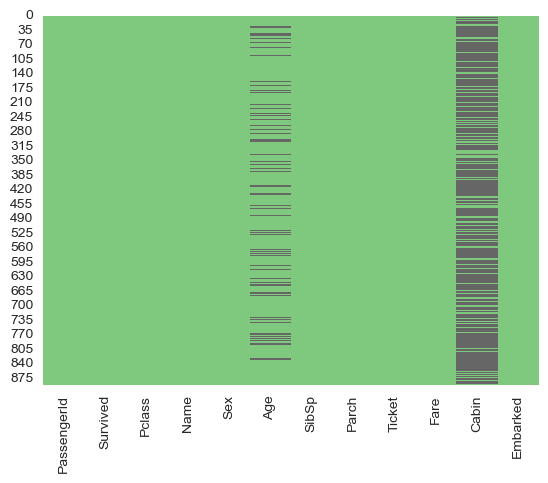

In [9]:
sns.heatmap(titanic_train.isnull(), cbar=False, cmap="Accent")

<Axes: xlabel='Sex', ylabel='count'>

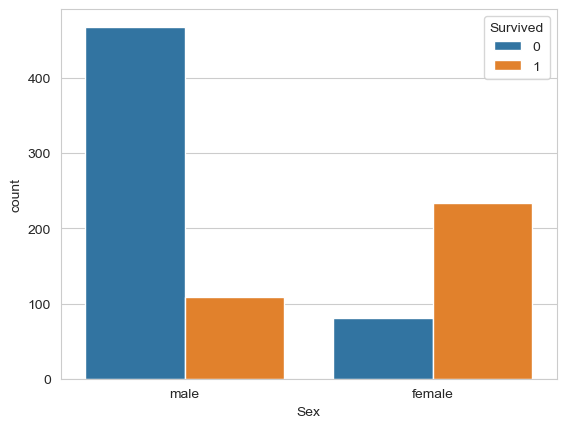

In [10]:
sns.countplot(titanic_train, x="Sex", hue="Survived")

<Axes: xlabel='Age', ylabel='Density'>

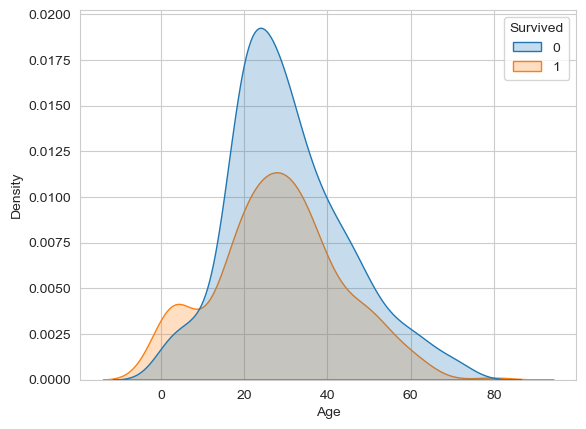

In [11]:
sns.kdeplot(titanic_train, x="Age", hue="Survived", fill=True)

<Axes: xlabel='count', ylabel='SibSp'>

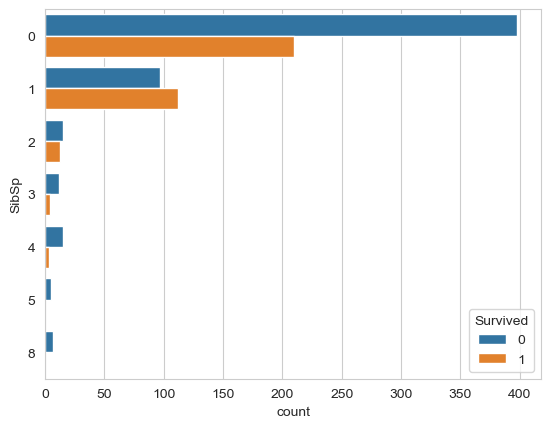

In [12]:
sns.countplot(titanic_train,y="SibSp", hue="Survived")

<Axes: xlabel='count', ylabel='Parch'>

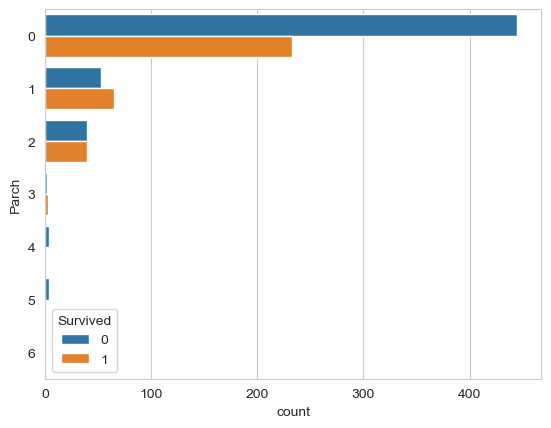

In [13]:
sns.countplot(titanic_train,y="Parch", hue="Survived")

<Axes: xlabel='Pclass', ylabel='Age'>

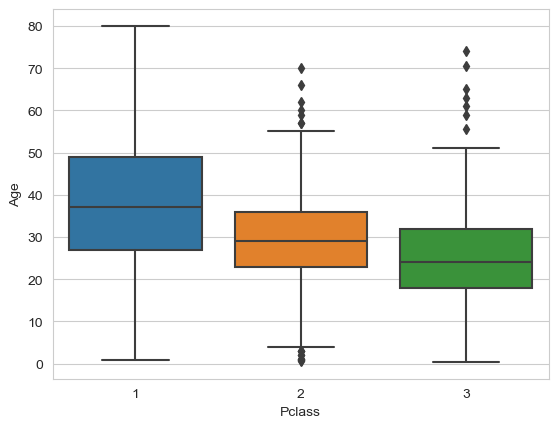

In [14]:
sns.boxplot(titanic_train, x="Pclass", y="Age")

In [15]:
train_mean = titanic_train[["Age", "Pclass"]].groupby("Pclass").mean()

In [16]:
train_mean

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


<Axes: xlabel='Pclass', ylabel='Age'>

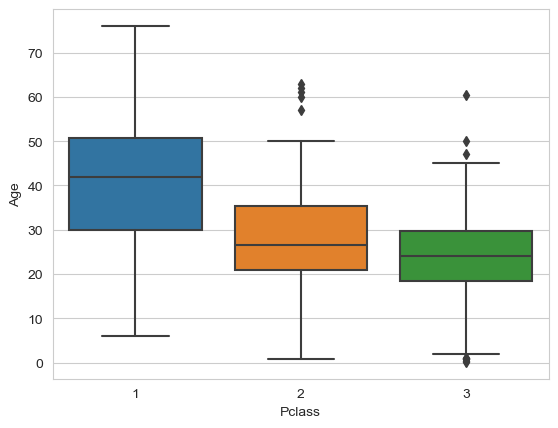

In [17]:
sns.boxplot(titanic_test, x="Pclass", y="Age")

In [18]:
test_mean = titanic_test[["Age", "Pclass"]].groupby("Pclass").mean()

In [19]:
test_mean

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [20]:
def impute_age(col, age_per_class):
    Age = col[0]
    Class = col[1]
    
    if pd.isnull(Age):
        if Class == 1: 
            return age_per_class.loc[1]["Age"]
        elif Class == 2: 
            return age_per_class.loc[2]["Age"]
        elif Class == 3: 
            return age_per_class.loc[3]["Age"]
    else:
        return Age

In [21]:
titanic_train["Age"] = titanic_train[["Age", "Pclass"]].apply(impute_age, axis=1, args=(train_mean,))

<Axes: >

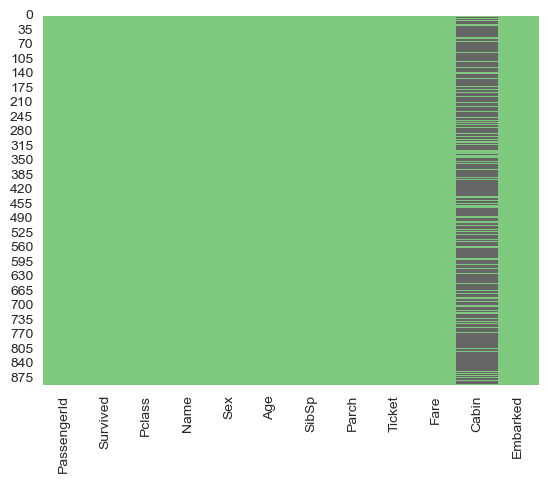

In [22]:
sns.heatmap(titanic_train.isnull(), cbar=False, cmap="Accent")

In [23]:
titanic_test["Age"] = titanic_train[["Age", "Pclass"]].apply(impute_age, axis=1, args=(test_mean,))

In [24]:
titanic_train.drop("Cabin", axis=1, inplace=True)

In [25]:
titanic_test.drop("Cabin", axis=1, inplace=True)

In [26]:
import re

In [27]:
titanic_train["Honor"] = titanic_train["Name"].apply(lambda name: re.split(r"[.,]", name)[1].strip())

In [28]:
titanic_train["Honor"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Honor, dtype: int64

<Axes: xlabel='count', ylabel='Honor'>

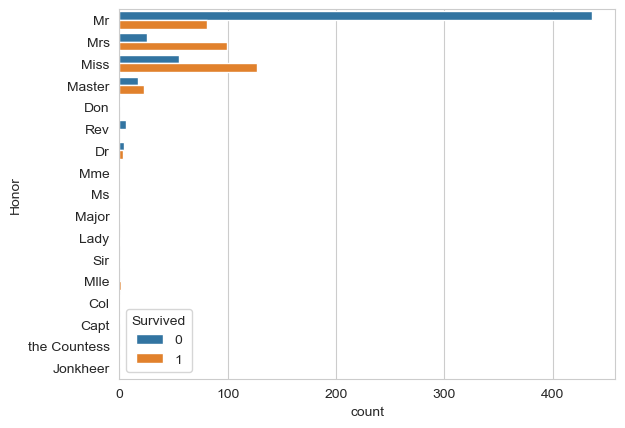

In [29]:
sns.countplot(titanic_train, y="Honor", hue="Survived")

In [30]:
titanic_test["Honor"] = titanic_test["Name"].apply(lambda name: re.split(r"[.,]", name)[1].strip())

In [31]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Honor
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,S,Mrs


In [32]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Honor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,Mr


In [33]:
sex = pd.get_dummies(titanic_train["Sex"], drop_first=True)
embark = pd.get_dummies(titanic_train["Embarked"], drop_first=True)
honor = pd.get_dummies(titanic_train["Honor"])
honor = honor[["Mr" ,"Miss", "Mrs", "Master", "Dr"]]

In [34]:
train = pd.concat((titanic_train,sex,honor,embark), axis=1)
train.drop(["Name", "PassengerId", "Sex", "Ticket", "Honor", "Embarked"], axis=1, inplace=True)

In [35]:
sex = pd.get_dummies(titanic_test["Sex"], drop_first=True)
embark = pd.get_dummies(titanic_test["Embarked"], drop_first=True)
honor = pd.get_dummies(titanic_test["Honor"])
honor = honor[["Mr" ,"Miss", "Mrs", "Master", "Dr"]]

In [36]:
test = pd.concat((titanic_test,sex,honor,embark), axis=1)
test.drop(["Name", "PassengerId", "Sex", "Ticket", "Honor", "Embarked"], axis=1, inplace=True)

In [37]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Mr,Miss,Mrs,Master,Dr,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,0,0,0,0,1


In [38]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Mr,Miss,Mrs,Master,Dr,Q,S
0,3,22.0,0,0,7.8292,1,1,0,0,0,0,1,0
1,3,38.0,1,0,7.0000,0,0,0,1,0,0,0,1
2,2,26.0,0,0,9.6875,1,1,0,0,0,0,1,0
3,3,35.0,0,0,8.6625,1,1,0,0,0,0,0,1
4,3,35.0,1,1,12.2875,0,0,0,1,0,0,0,1


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
logisticModel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [41]:
X_train = train.drop("Survived", axis=1)
y_train = train[["Survived"]]

In [42]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Mr,Miss,Mrs,Master,Dr,Q,S
0,3,22.00000,1,0,7.2500,1,1,0,0,0,0,0,1
1,1,38.00000,1,0,71.2833,0,0,0,1,0,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1,0,0,0,0,1
3,1,35.00000,1,0,53.1000,0,0,0,1,0,0,0,1
4,3,35.00000,0,0,8.0500,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,0,0,0,0,0,1
887,1,19.00000,0,0,30.0000,0,0,1,0,0,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1,0,0,0,0,1
889,1,26.00000,0,0,30.0000,1,1,0,0,0,0,0,0


In [43]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [44]:
logisticModel.fit(X_train, y_train)

C:\Users\Home PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [45]:
pd.DataFrame(logisticModel.coef_.ravel(), X_train.columns, columns=["coef"])

,coef
Pclass,-1.072303
Age,-0.033045
SibSp,-0.502636
Parch,-0.316623
Fare,0.003584
male,-1.792216
Mr,-0.877104
Miss,0.144354
Mrs,0.929417
Master,2.005707


In [50]:
test.groupby("Pclass").mean()

,Age,SibSp,Parch,Fare,male,Mr,Miss,Mrs,Master,Dr,Q,S
Pclass,,,,,,,,,,,,
1,27.877574,0.476636,0.383178,94.280297,0.532710,0.485981,0.130841,0.327103,0.018692,0.009346,0.009346,0.467290
2,28.844271,0.376344,0.344086,22.202104,0.677419,0.634409,0.172043,0.150538,0.021505,0.000000,0.043011,0.838710
3,28.665510,0.463303,0.417431,12.459678,0.669725,0.591743,0.220183,0.105505,0.077982,0.000000,0.188073,0.651376


In [55]:
test["Fare"].fillna(12.459678, inplace=True)

In [56]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Mr        0
Miss      0
Mrs       0
Master    0
Dr        0
Q         0
S         0
dtype: int64

In [57]:
prediction = logisticModel.predict(test)

In [61]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
result = pd.DataFrame({"PassengerId": titanic_test.PassengerId, "Prediction": prediction})

In [68]:
result

,PassengerId,Prediction
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
